In [2]:
# Preprocessing of heart disease CSV data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# from sklearn.decomposition import PCA # Will revisit for visualizations
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC

# Read the CSV so that it can be processed
heartDiseaseData = pd.read_csv("Heart_Disease_Prediction.csv")

# Used the replace method from pandas library per the documentation to convert the target column (Heart Disease) values in the dataframe
# Replaced instances of "Presence" with 1 and instances of "Absence" with 0
# Referred to https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html
heartDiseaseData.replace(to_replace = "Presence", value = 1, inplace = True)
heartDiseaseData.replace(to_replace = "Absence", value = 0, inplace = True)
print(heartDiseaseData)

# Dropped the target column (again Heart Disease) to form the attributes dataframe
# Referred to https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html
heartDiseaseAttr = heartDiseaseData.drop(columns = ["Heart Disease"])
print(heartDiseaseAttr)

# Specified the heart disease target var
heartDiseaseTarget = heartDiseaseData["Heart Disease"]
print(heartDiseaseTarget)
print("\n")

# Referred to https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html for splitting the data into training and testing sets
# From prior experience, an 80-20 train-test split might be useful
heartDiseaseAttrTrain, heartDiseaseAttrTest, heartDiseaseTargetTrain, heartDiseaseTargetTest = train_test_split(heartDiseaseAttr, heartDiseaseTarget, test_size = 0.20, random_state = 50, shuffle = True)

# Normalizing in accordance with our project proposal (our team discussed min-max normalization)
# Referred to https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler
# Fit the scaler on the heart disease attributes of the training data, and then transformed the attributes in both the training and testing data
heartDiseaseMMScaler = MinMaxScaler()
fittedHeartDiseaseMMScale = heartDiseaseMMScaler.fit(heartDiseaseAttrTrain)
normHeartDiseaseAttrTrain = fittedHeartDiseaseMMScale.transform(heartDiseaseAttrTrain)
normHeartDiseaseAttrTest = fittedHeartDiseaseMMScale.transform(heartDiseaseAttrTest)

# Referred to https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
# Trained Log. Reg. classifier with the normalized heart disease attrs and the targ values of the training data
# Predicted on normalized heart disease attrs of the testing data
# Printed the score of the model to quantify accuracy of predictions
heartDiseaseLogRegClassifier = LogisticRegression()
heartDiseaseLogRegClassifier.fit(normHeartDiseaseAttrTrain, heartDiseaseTargetTrain)
heartDiseaseLogRegClassifierPred = heartDiseaseLogRegClassifier.predict(normHeartDiseaseAttrTest)
print(heartDiseaseTargetTest)
print(heartDiseaseLogRegClassifierPred)
print("Logistic Regression Score: " + str(heartDiseaseLogRegClassifier.score(normHeartDiseaseAttrTest, heartDiseaseTargetTest)))

# Referred to https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier.kneighbors
# Trained KNeighbors classifier with the normalized heart disease attrs and the targ values of the training data
# Predicted on normalized heart disease attrs of the testing data
# Printed the score of the model to quantify accuracy of predictions
heartDiseaseKNeighborsClassifier = KNeighborsClassifier()
heartDiseaseKNeighborsClassifier.fit(normHeartDiseaseAttrTrain, heartDiseaseTargetTrain)
heartDiseaseKNeighborsClassifierPred = heartDiseaseKNeighborsClassifier.predict(normHeartDiseaseAttrTest)
print(heartDiseaseTargetTest)
print(heartDiseaseKNeighborsClassifierPred)
print("KNeighbors Score: " + str(heartDiseaseKNeighborsClassifier.score(normHeartDiseaseAttrTest, heartDiseaseTargetTest)))

print("Logistic Regression Score: " + str(heartDiseaseLogRegClassifier.score(normHeartDiseaseAttrTest, heartDiseaseTargetTest)))



# Referred to https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html
# Trained LinearSVC classifier with the normalized heart disease attrs and the targ values of the training data
# Predicted on normalized heart disease attrs of the testing data
# Printed the score of the model to quantify accuracy of predictions
heartDiseaseLinSVCClassifier = LinearSVC()
heartDiseaseLinSVCClassifier.fit(normHeartDiseaseAttrTrain, heartDiseaseTargetTrain)
heartDiseaseLinSVCClassifierPred = heartDiseaseLinSVCClassifier.predict(normHeartDiseaseAttrTest)
print(heartDiseaseTargetTest)
print(heartDiseaseLinSVCClassifierPred)
print("LinearSVC Score: " + str(heartDiseaseLinSVCClassifier.score(normHeartDiseaseAttrTest, heartDiseaseTargetTest)))


     Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0     70    1                4  130          322             0            2   
1     67    0                3  115          564             0            2   
2     57    1                2  124          261             0            0   
3     64    1                4  128          263             0            0   
4     74    0                2  120          269             0            2   
..   ...  ...              ...  ...          ...           ...          ...   
265   52    1                3  172          199             1            0   
266   44    1                2  120          263             0            0   
267   56    0                2  140          294             0            2   
268   57    1                4  140          192             0            0   
269   67    1                4  160          286             0            2   

     Max HR  Exercise angina  ST depression  Slope 

C:\Users\jacob\AppData\Local\Temp\ipykernel_16148\3925558565.py:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  heartDiseaseData.replace(to_replace = "Absence", value = 0, inplace = True)


-0.018739185482094002


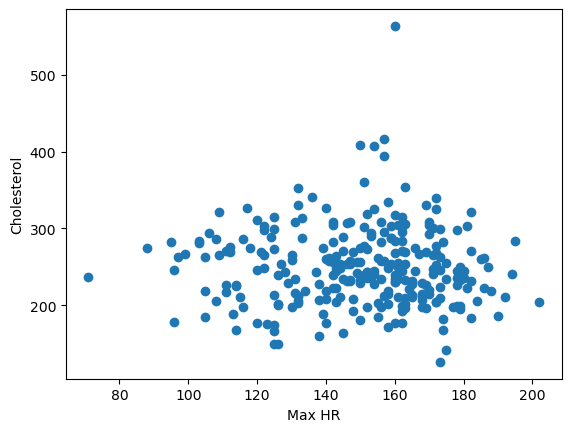

0.22005630764974443


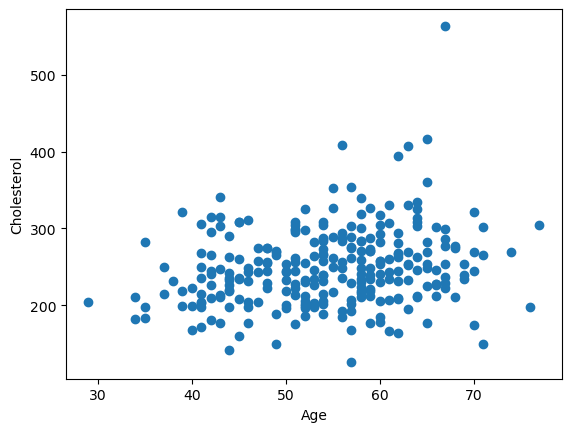

0.126541473692584


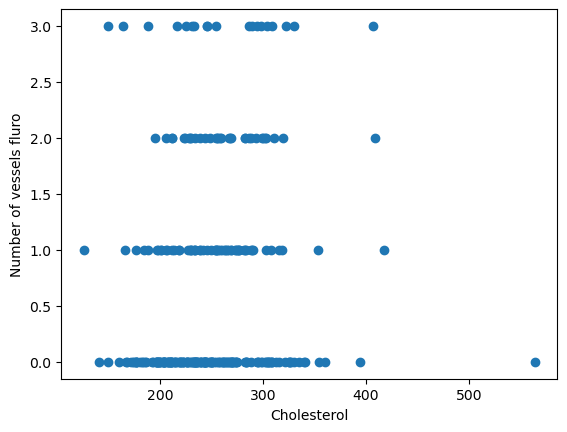

0.1180205306051699


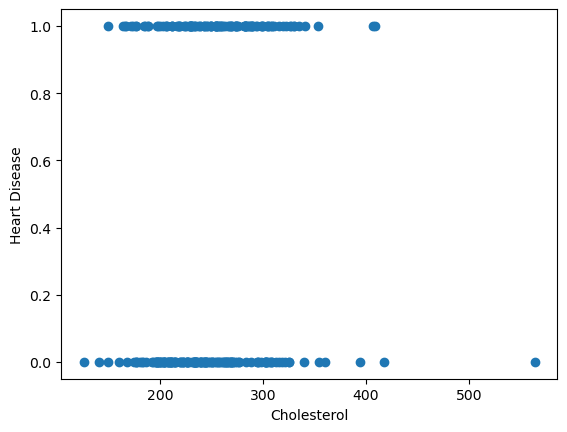

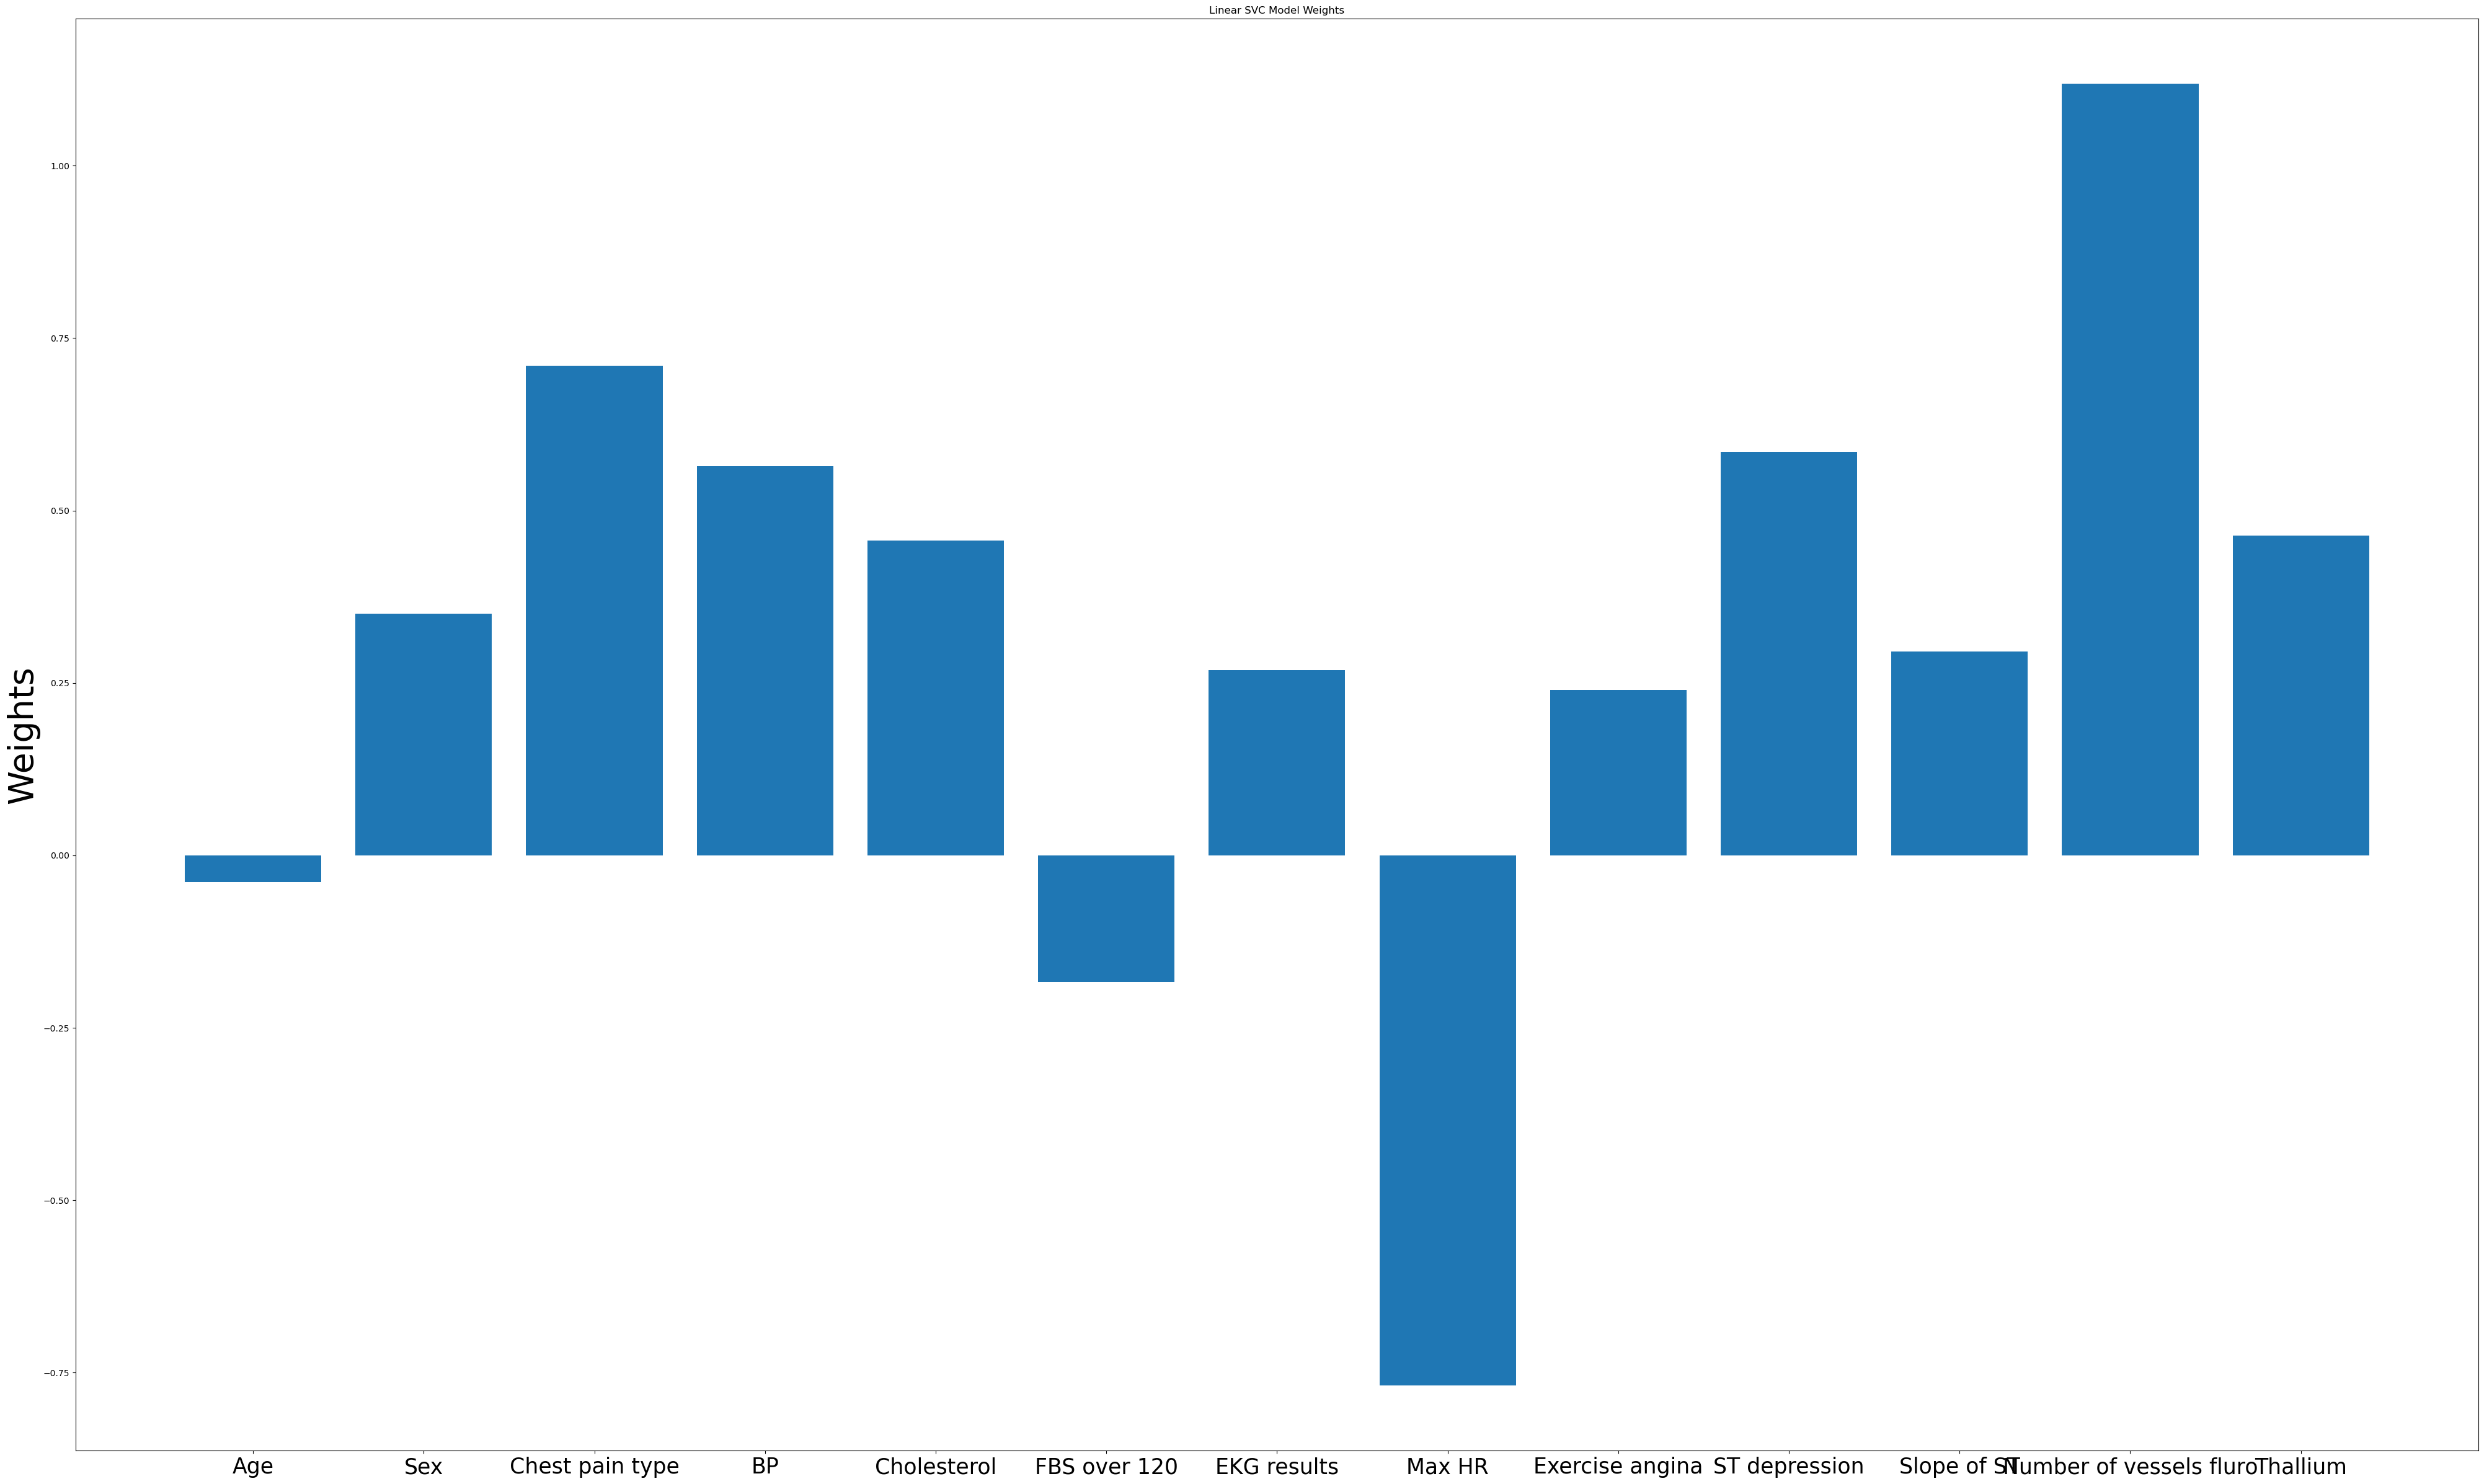

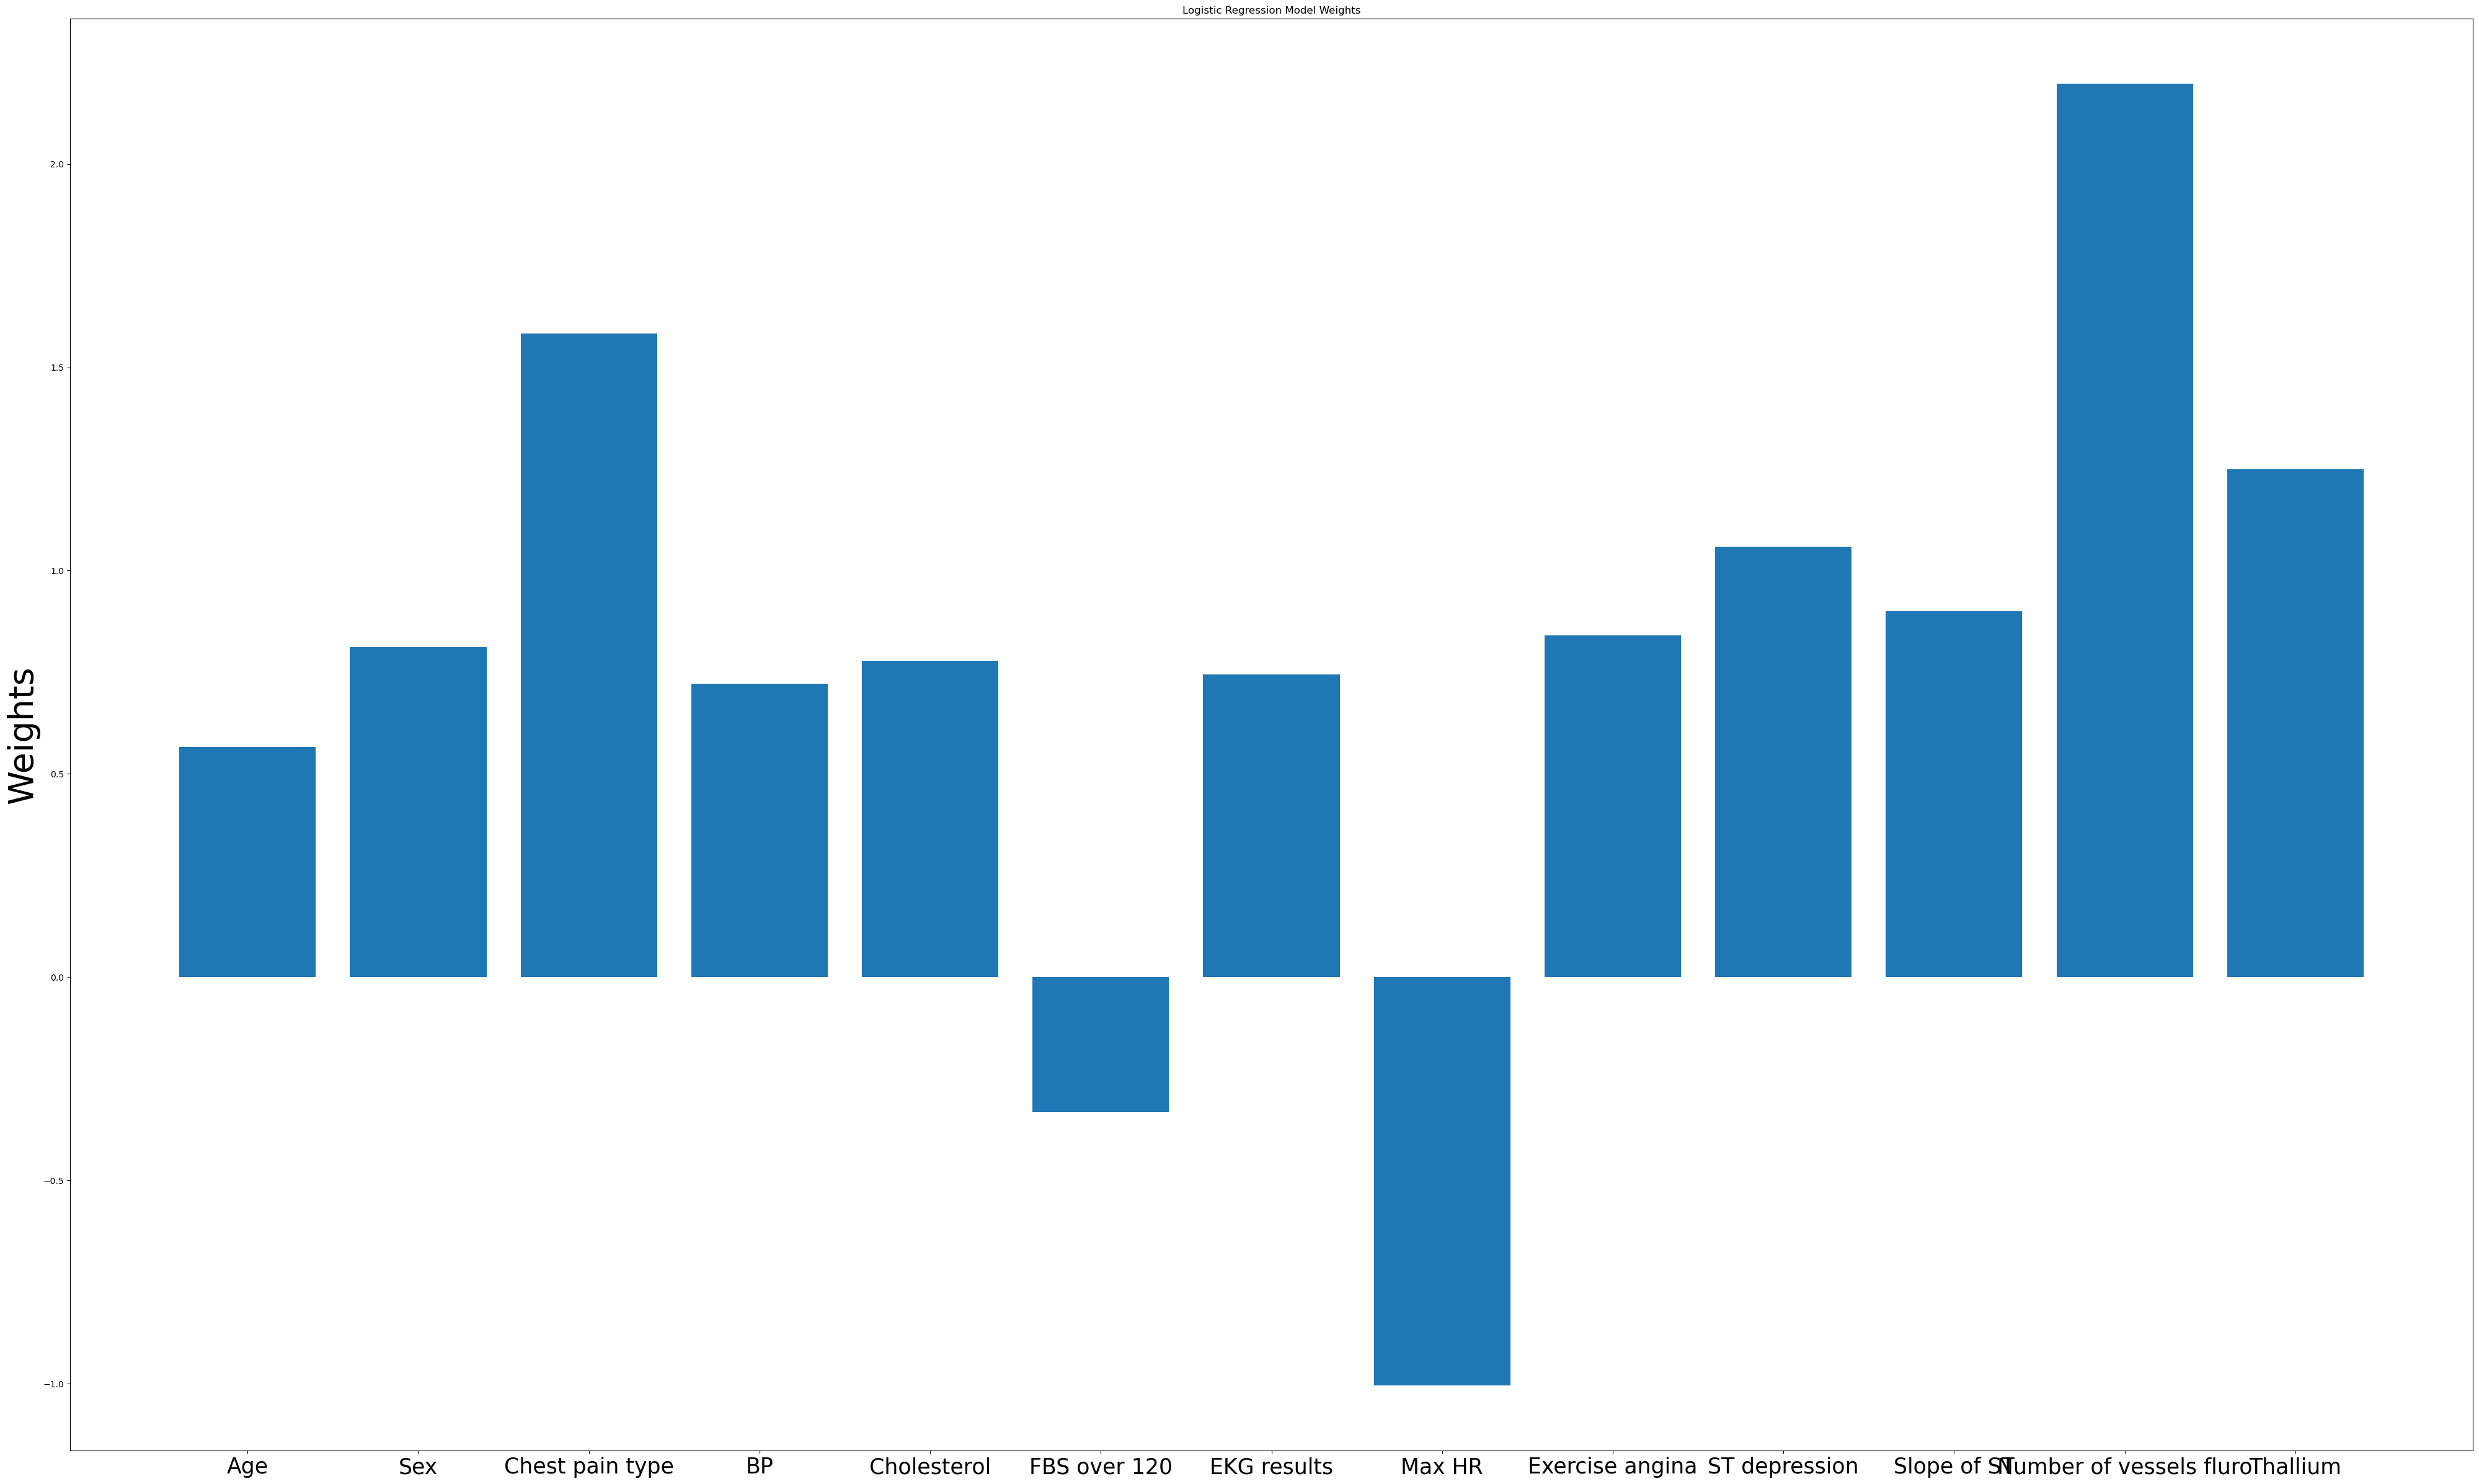

range=48
0.21232218744342823


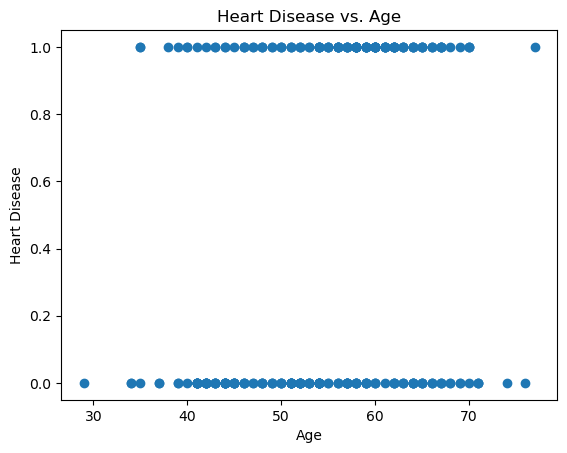

range=1
0.2977207557240846


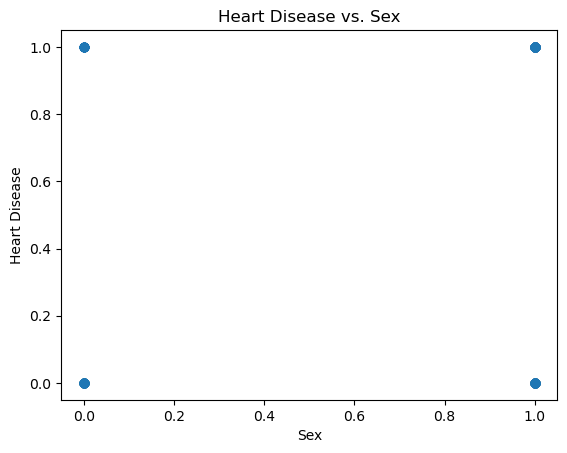

range=3
0.41743620562785266


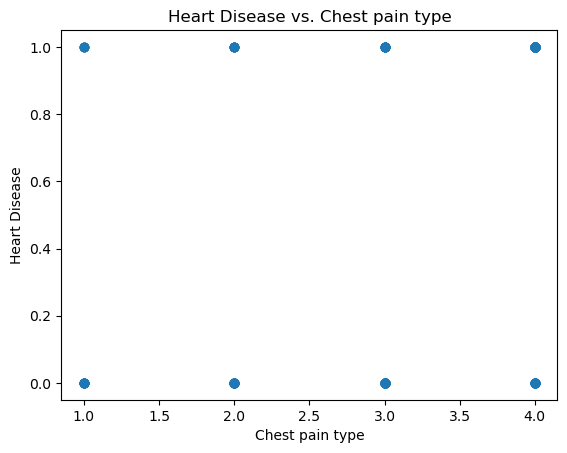

range=106
0.15538265617576877


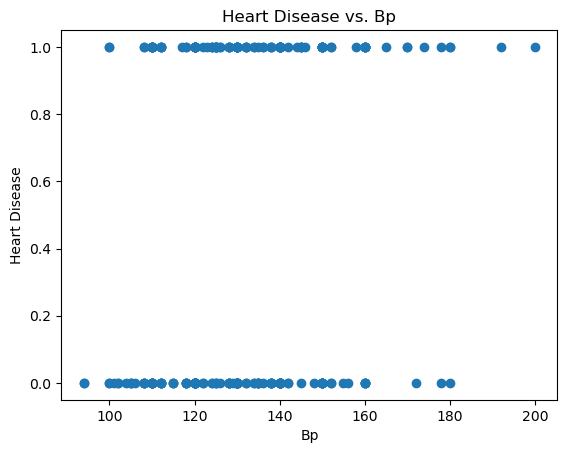

range=438
0.1180205306051699


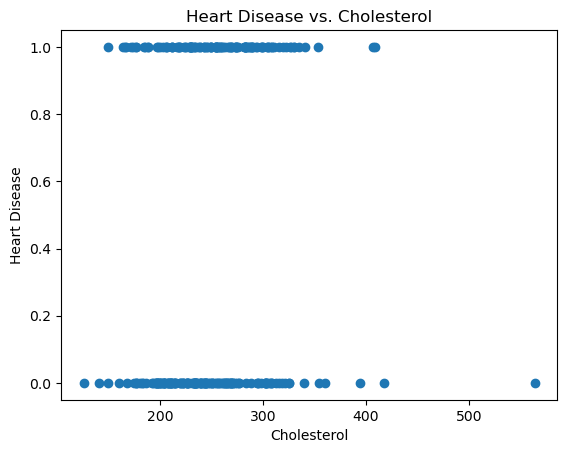

range=1
-0.01631883414420555


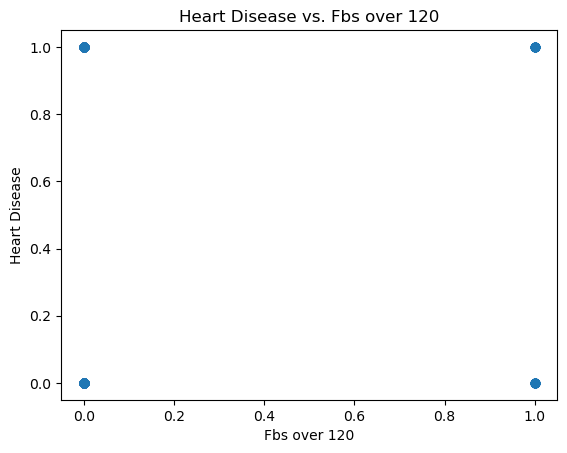

range=2
0.18209075568278277


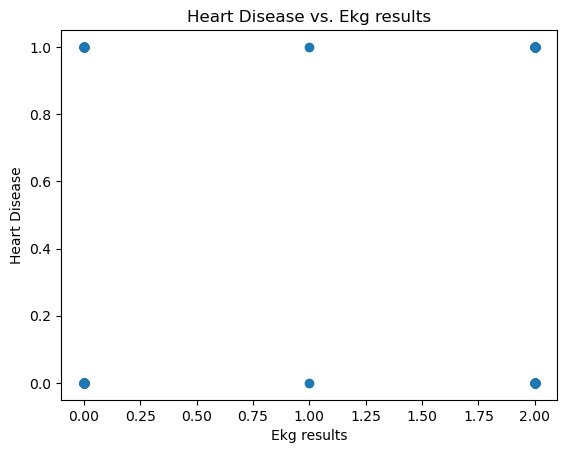

range=131
-0.4185139653265939


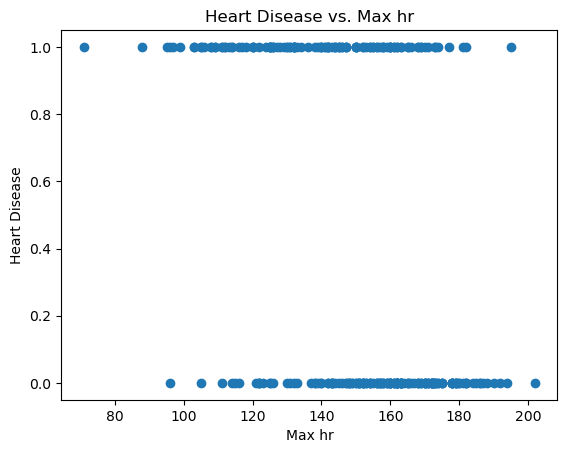

range=1
0.4193027091902971


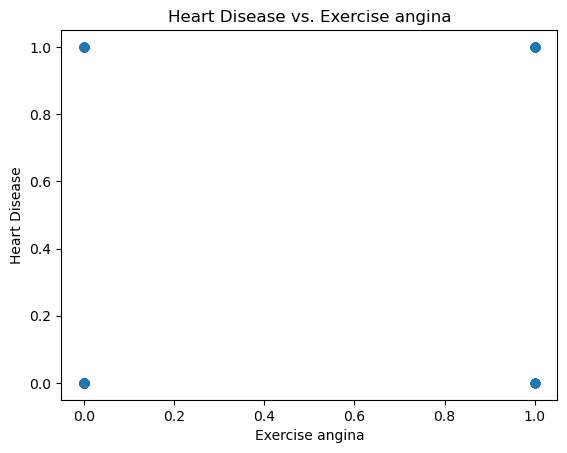

range=6.2
0.4179674372274263


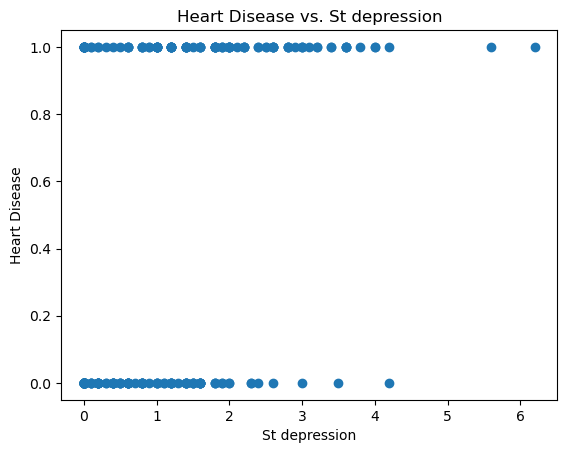

range=2
0.3376159572329903


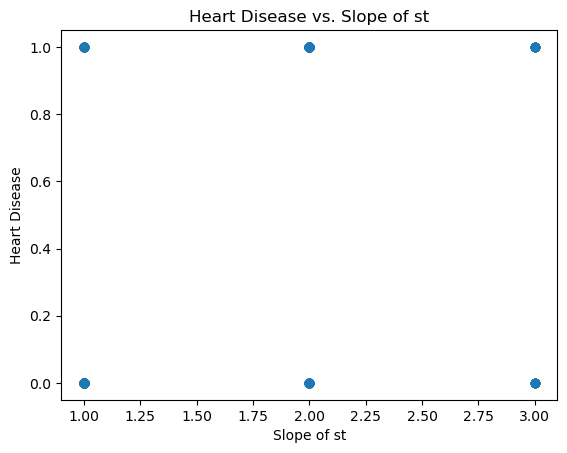

range=3
0.45533645047270865


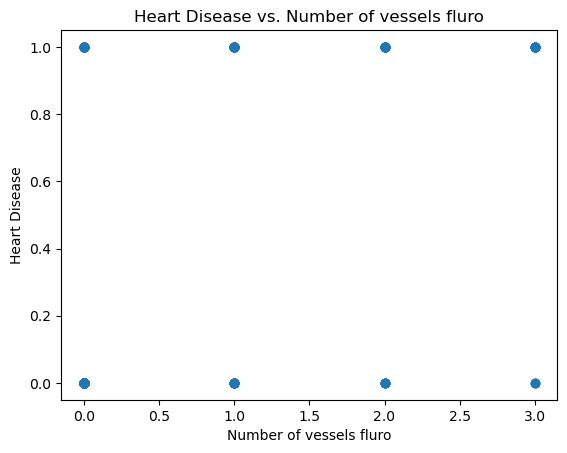

range=4
0.5250203329618741


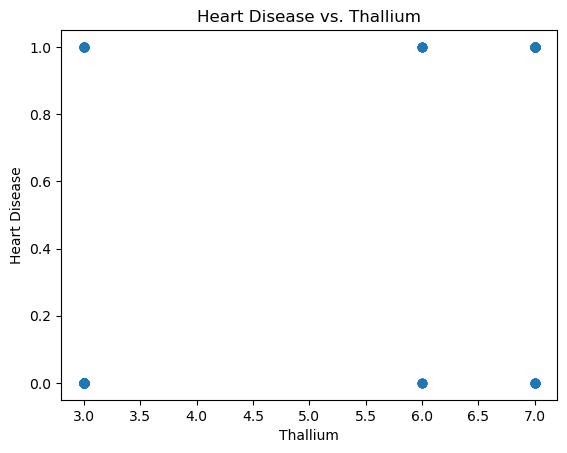

Correlations :
{'Age': 0.21232218744342823, 'Sex': 0.2977207557240846, 'Chest pain type': 0.41743620562785266, 'BP': 0.15538265617576877, 'Cholesterol': 0.1180205306051699, 'FBS over 120': -0.01631883414420555, 'EKG results': 0.18209075568278277, 'Max HR': -0.4185139653265939, 'Exercise angina': 0.4193027091902971, 'ST depression': 0.4179674372274263, 'Slope of ST': 0.3376159572329903, 'Number of vessels fluro': 0.45533645047270865, 'Thallium': 0.5250203329618741}
              Age         Sex  Chest pain type          BP  Cholesterol  \
count  270.000000  270.000000       270.000000  270.000000   270.000000   
mean    54.433333    0.677778         3.174074  131.344444   249.659259   
std      9.109067    0.468195         0.950090   17.861608    51.686237   
min     29.000000    0.000000         1.000000   94.000000   126.000000   
25%     48.000000    0.000000         3.000000  120.000000   213.000000   
50%     55.000000    1.000000         3.000000  130.000000   245.000000   
75%   

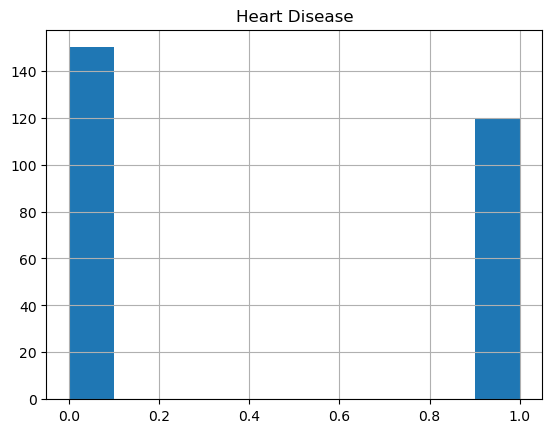

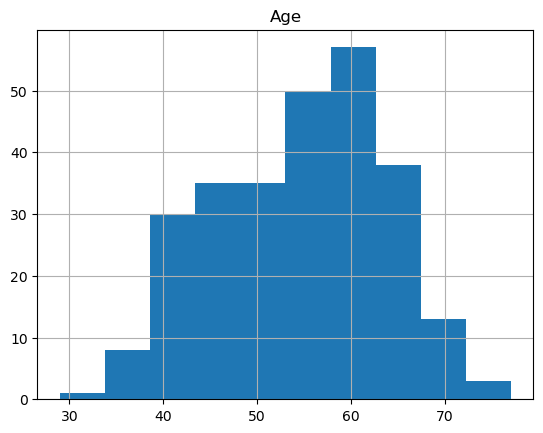

In [7]:


x=heartDiseaseData['Max HR']
y=heartDiseaseData['Cholesterol']
correlation_matrix = np.corrcoef(x,y)
r_value_numpy = correlation_matrix[0,1]
print(r_value_numpy)
plt.xlabel('Max HR')
plt.ylabel('Cholesterol')
plt.scatter(x,y)
plt.show()

x=heartDiseaseData['Age']
y=heartDiseaseData['Cholesterol']
plt.xlabel('Age')
plt.ylabel('Cholesterol')
correlation_matrix = np.corrcoef(x,y)
r_value_numpy = correlation_matrix[0,1]
print(r_value_numpy)
plt.scatter(x,y)
plt.show()

x=heartDiseaseData['Cholesterol']
y=heartDiseaseData['Number of vessels fluro']
plt.xlabel('Cholesterol')
plt.ylabel('Number of vessels fluro')
correlation_matrix = np.corrcoef(x,y)
r_value_numpy = correlation_matrix[0,1]
print(r_value_numpy)
plt.scatter(x,y)
plt.show()

x=heartDiseaseData['Cholesterol']
y=heartDiseaseData['Heart Disease']
plt.xlabel('Cholesterol')
plt.ylabel('Heart Disease')
correlation_matrix = np.corrcoef(x,y)
r_value_numpy = correlation_matrix[0,1]
print(r_value_numpy)
plt.scatter(x,y)
plt.show()


plt.figure(figsize=(50,30))
plt.xticks(fontsize=25)
plt.title('Linear SVC Model Weights')
plt.ylabel('Weights',fontsize=40)
plt.bar(heartDiseaseData.columns.drop('Heart Disease'),heartDiseaseLinSVCClassifier.coef_[0])
plt.show()

plt.figure(figsize=(50,30))
plt.xticks(fontsize=25)

plt.title('Logistic Regression Model Weights')
plt.ylabel('Weights',fontsize=40)
plt.bar(heartDiseaseData.columns.drop('Heart Disease'),heartDiseaseLogRegClassifier.coef_[0])
plt.show()



correlations = {}
predictors = heartDiseaseData.select_dtypes(include='number').columns.drop('Heart Disease')

for predictor in predictors:
    fig, ax = plt.subplots()
    ax.scatter(heartDiseaseData[predictor], heartDiseaseData['Heart Disease'])
    x=heartDiseaseData[predictor]
    y=heartDiseaseData['Heart Disease']
    print(f'range={heartDiseaseData[predictor].max()-heartDiseaseData[predictor].min()}')

    correlation_matrix = np.corrcoef(x,y)
    r_value_numpy = correlation_matrix[0,1]
    correlations[predictor] = r_value_numpy
    print(r_value_numpy)
    ax.set_xlabel(predictor.capitalize())
    ax.set_ylabel('Heart Disease')
    ax.set_title(f'Heart Disease vs. {predictor.capitalize()}')
    plt.show()




print("Correlations :")
print(correlations)



heartDiseaseData.hist(column='Heart Disease')
heartDiseaseData.hist(column='Age')


print(heartDiseaseData.describe())
print('Logistic Reg model coefficients : ',heartDiseaseLogRegClassifier.coef_)
print('Linear SVC model coefficients : ',heartDiseaseLinSVCClassifier.coef_)


print('KNeighbors Score: 0.8333333333333334')
print('Logistic Regression Score: 0.8518518518518519')







# covarianceScaler = MinMaxScaler()
# covarianceFittedMMScaler = covarianceScaler.fit(heartDiseaseData)
# covarianceData = covarianceFittedMMScaler.transform(heartDiseaseData)
covariance_matrix = np.cov(heartDiseaseData)
print(covariance_matrix)


covariance_matrix = heartDiseaseData.cov()
print(covariance_matrix)





In [4]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
neigh.fit(heartDiseaseData)
A = neigh.kneighbors_graph(heartDiseaseData)
A.toarray()


array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])